In [3]:
import urllib.request, json 
import requests
from bs4 import BeautifulSoup,SoupStrainer
import pkg_resources
import os
import re
import multiprocessing
import contextlib
from dateutil import parser
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import glob

In [8]:
def processData(df):
    df['day'] = pd.to_datetime(df['day'])
    return df.groupby(['project', df['day'].dt.strftime('%Y-%m')])['num_downloads'].sum().reset_index()

In [9]:
# monthly pip download data
download_info_raw = pd.concat([processData(pd.read_parquet(file)) for file in glob.glob('data/package_downloads/daily_pip_downloads/*')])

In [15]:
download_info = download_info_raw.rename({'day':'month'}, axis = 1).groupby(['month','project'])['num_downloads'].sum().reset_index()

In [16]:
# all python projects
download_info[['project']].drop_duplicates().to_csv('data/inputs/packages.csv')

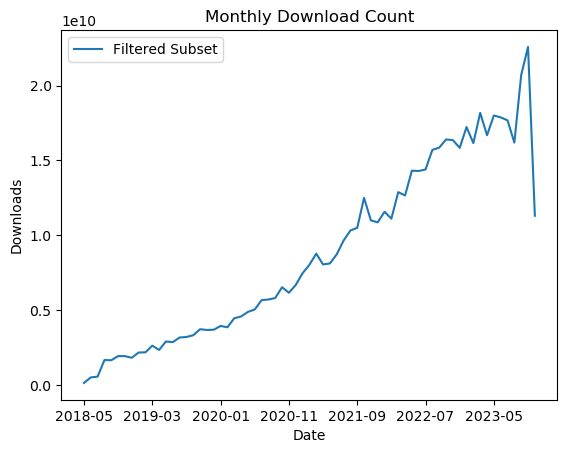

In [33]:
# graph downloads for all libraries and subset
download_info.groupby('month')['num_downloads'].sum().rename('Filtered Subset').plot()
plt.legend()
plt.ylabel('Downloads')
plt.xlabel('Date')
plt.title('Monthly Download Count')
plt.show()

In [34]:
download_info.sort_values('num_downloads',ascending = False).drop_duplicates('project').head(20)

,month,project,num_downloads
829183,2023-10,boto3,934585105
839913,2023-10,urllib3,461254441
777673,2023-06,awscli,394234588
829187,2023-10,botocore,383829366
838103,2023-10,requests,354769849
825828,2023-09,setuptools,341120267
839812,2023-10,typing-extensions,338318767
829483,2023-10,certifi,322967358
838354,2023-10,s3transfer,288125583
840175,2023-10,wheel,274268847
